# Machine Learning Project

## Data manipulation and plotting libraries

# Assignment: Perform the following analyses on gum_disease_data.txt 
## The features will be the bacterial species abundances and the classifier will be status. 

## (1) Run a Decision Tree classifier.
## (2) Run a Support Vector Machine analysis.
## The next item is not graded ->
## (3) NOT GRADED (for fun): Tensor flow neural network.

Helpful sites for Decision Tree code:
http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/
Plotting the decision trees:
https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn

(Some Random Forest code in case you are interested: https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn)

For Support Vector Machine help see the HA3-checkpoint jupyter notebook or python script.

For Tensor Flow support (using Iris dataset):
https://www.kaggle.com/richbrosius/iris-classification-using-tensorflow


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score


## Decision Tree libraries

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

## SVM Libraries

In [6]:
from sklearn import svm
from sklearn.svm import LinearSVC

## Read in data set

In [8]:
##DO NOT CHANGE THIS LINE OF CODE
df=pd.read_csv('gum_disease_data.txt', sep='\t', index_col=False, low_memory=False)
df.head()

,id,strep,prev,lepto,fuso,veil,time,status,pocket,deepest
0,S001,57.4,10.2,0.1,0.0,6.9,1,0,2.7,3.8
1,S001,26.0,0.0,25.6,0.0,6.3,2,0,2.7,3.0
2,S006,19.0,24.2,4.8,5.7,4.2,1,0,2.5,3.2
3,S006,15.2,4.2,0.2,2.6,3.4,2,0,2.4,3.2
4,S007,33.2,2.3,7.4,1.3,12.0,1,0,2.4,2.7


## Training set for all analyses

In [9]:
type(df['status'])
df.dtypes

id          object
strep      float64
prev       float64
lepto      float64
fuso       float64
veil       float64
time         int64
status       int64
pocket     float64
deepest    float64
dtype: object

In [10]:
#use this
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:6], df['status'], test_size = 0.33, random_state = 100)

## Part 1

## Decision Tree Analysis

## Generate Decision Tree

In [11]:
#clf = RandomForestClassifier(n_estimators = 100) 
#clf.fit(X_train, y_train)
print(X_train)
print(y_train)
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=5)
#print(clf_gini)
clf_gini.fit(X_train, y_train)


    strep  prev  lepto  fuso  veil
6    12.3  11.5    9.1   5.5   5.7
46   22.0   6.6    3.2   7.1   6.7
37    5.0  11.5    5.8  17.8   5.3
59    7.9   5.3   21.0  13.4  26.2
50   29.0   3.1   26.6   9.3   9.8
17   14.2   8.3    6.0   8.1   4.9
38    3.9  14.2   13.8  18.5   1.9
60   24.0  29.9   18.9   3.2   4.1
42   61.7   1.7    0.4   2.6   2.4
45    2.9   6.6    4.3  17.1   0.8
30   11.4  15.7   18.6   6.6   3.6
66   19.9   0.0    2.5   0.0   0.1
56   19.1  10.4    9.6   7.0   9.3
40   18.6   2.4   10.3   8.8   6.4
64   39.8   0.7    7.6   0.3   4.5
47    2.7  20.2    8.3  12.5   5.6
7     3.3  24.7    6.3  10.4   3.0
3    15.2   4.2    0.2   2.6   3.4
51    6.4  19.6    5.9  11.8  14.2
62   36.5   1.9   10.8   4.9  10.8
58    2.1  11.0   11.9  11.8   4.4
19    8.1   3.1   11.2  25.0   3.8
13   26.6   3.4   13.9   9.0   4.1
1    26.0   0.0   25.6   0.0   6.3
31    5.3  14.1   15.0  17.1   4.7
4    33.2   2.3    7.4   1.3  12.0
44    1.6   6.9    9.9  10.1   3.1
27   18.8   7.6   18

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=100)

## Show gini prediction

In [12]:
clf_gini.predict([[12.3, 11.5, 9.1, 5.5, 5.7]])


C:\Users\erinh\anaconda3\envs\pandas_practice\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

## Print accuracy

In [13]:
y_pred = clf_gini.predict(X_test)
print("Accuracy is", accuracy_score(y_test,y_pred)*100)

Accuracy is 100.0


## Create dot file of Decision Tree

In [14]:

from sklearn.tree import export_graphviz

out_graph = export_graphviz(clf_gini, out_file='tree_limited.dot', feature_names = X_train.columns.tolist(),
                class_names =["0", "1"], rounded = True, proportion = False, precision = 2, filled = True)


## Part 2

## Support Vector Machine

In [15]:
from scipy.spatial import distance
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn import datasets
import seaborn as sns

## Visualize the first 5 rows of the dataset

In [16]:
df.head()

,id,strep,prev,lepto,fuso,veil,time,status,pocket,deepest
0,S001,57.4,10.2,0.1,0.0,6.9,1,0,2.7,3.8
1,S001,26.0,0.0,25.6,0.0,6.3,2,0,2.7,3.0
2,S006,19.0,24.2,4.8,5.7,4.2,1,0,2.5,3.2
3,S006,15.2,4.2,0.2,2.6,3.4,2,0,2.4,3.2
4,S007,33.2,2.3,7.4,1.3,12.0,1,0,2.4,2.7


## View pairwise plots of all bacteria features (strep, prev, lepto, fuso, veil) to find best combination of dimensions (clearest separation between class 0 and 1)
### Best is Strep

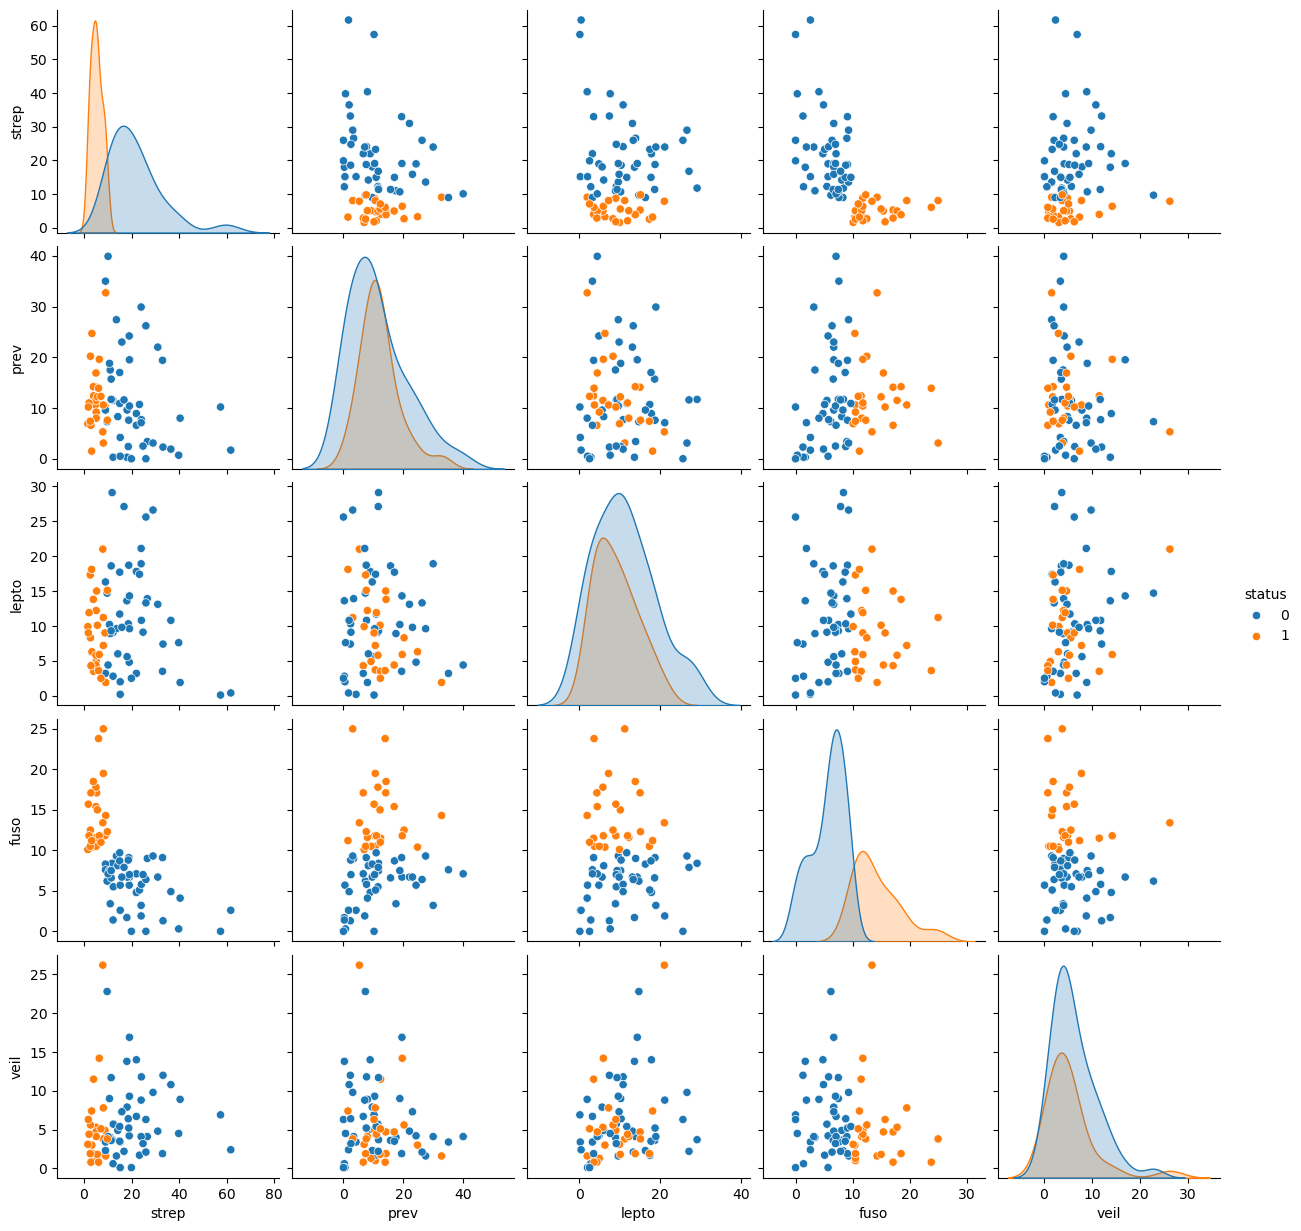

In [17]:
sns.pairplot(df, vars = ['strep', 'prev', 'lepto','fuso','veil'], hue = 'status')

## Make the training and testing arrays

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:6], df['status'],
                                                   test_size = 0.33, random_state = 56)

training_array = []
train_pl_array = np.asarray(X_train['strep'])
train_pw_array = np.asarray(X_train['fuso'])
for i in range(0, len(train_pl_array)):
    pair = []
    pair.extend([train_pl_array[int(i)], train_pw_array[int(i)]])
    training_array.append(pair)
training_array = np.array(training_array)

testing_array = []
test_pl_array = np.asarray(X_test['strep'])
test_pw_array = np.asarray(X_test['fuso'])
for i in range(0, len(test_pl_array)):
    pair = []
    pair.extend([test_pl_array[int(i)], test_pw_array[int(i)]])
    testing_array.append(pair)
testing_array = np.array(testing_array)

# Part A) Non-linear SVM Classifier

## Train the SVM model

In [19]:
y_train = np.array(y_train)
clf = svm.SVC(gamma= 'auto')
clf.fit(training_array, y_train)

SVC(gamma='auto')

## SVM model predictions on the test data

In [20]:
prediction = clf.predict(testing_array)
prediction

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0], dtype=int64)

## Make the confusion matrix. Categories "Healthy" (status 0) and "Not Healthy" (status 1)

In [21]:
from sklearn.metrics import confusion_matrix
confuse = pd.DataFrame(confusion_matrix(y_test, prediction),
                       columns= ['Healthy', 'Not Healthy'],
                       index = ['Healthy', 'Not Healthy'])
confuse

,Healthy,Not Healthy
Healthy,17,0
Not Healthy,2,5


## Show Decision Boundary Plot

Text(0.5, 1.0, 'SVM Decision Boundary Region')

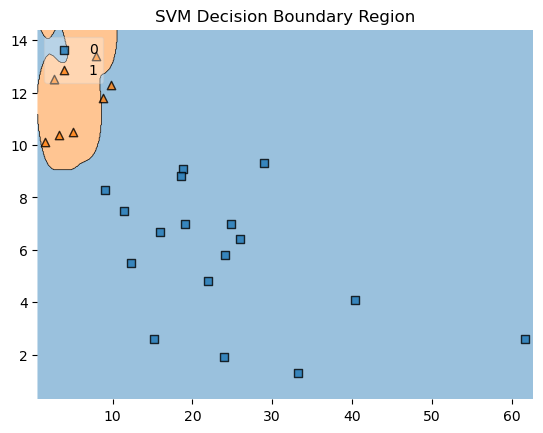

In [23]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X= testing_array, 
                      y=np.array(y_test),
                      clf=clf, 
                      legend=2)
plt.title('SVM Decision Boundary Region')

In [ ]:
# Part B) Linear SVM Classifier

## Train the linear classifier

## Make the confusion matrix. Categories "Healthy" (status 0) and "Not Healthy" (status 1)

In [24]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state= 0, tol = 1e-5)
clf.fit(training_array, y_train)

prediction_2 = clf.predict(testing_array)
prediction_2

pd.DataFrame(confusion_matrix(prediction_2, y_test),
             columns = ['Healthy', 'Not Healthy'],
             index = ['Healthy', 'Not Healthy'])

C:\Users\erinh\anaconda3\envs\pandas_practice\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


,Healthy,Not Healthy
Healthy,17,0
Not Healthy,0,7


## Show Precision and Recall scores

In [25]:
precision_score(prediction_2, y_test)

recall_score(prediction_2, y_test)

1.0

## Show Decision Boundary Plot

Text(0.5, 1.0, 'SVM Decision Boundary Region')

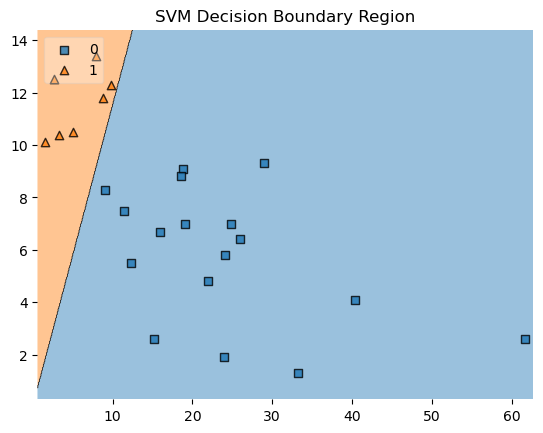

In [26]:
plot_decision_regions(X= testing_array, 
                      y=np.array(y_test),
                      clf=clf, 
                      legend=2)
plt.title('SVM Decision Boundary Region')

# Part C) Neural Network extra credit